In [4]:
import maze2 as mz
import numpy as np
import matplotlib.pyplot as plt
import qlearning as ql
from sarsa import sarsa
from MC import mc
import tqdm
from utility import monte_carlo_success

In [5]:
# Create a maze
maze = np.array([
    [0, 0, 1, 0, 0, 0, 0, 3],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0]
])
env = mz.Maze(maze)

maze_no_onstacles = np.array([
    [0, 0, 1, 0, 0, 0, 0, 3],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0]
])
maze_no_onstacles[maze_no_onstacles==1] = 0
env_no_obstacles = mz.Maze(maze_no_onstacles)

env_p0 = mz.Maze(maze, poison_prob=0)

env_p0_wallminus1 = mz.Maze(maze, poison_prob=0)
env_p0_wallminus1.set_rewards(0, 1, -1, 0)

very_easy_maze = np.array([
    [0, 0, 3],
    [0, 0, 0],
    [0, 0, 2]
])
very_easy_env = mz.Maze(very_easy_maze, poison_prob=0)

f = "results/maze2_value_iteration.npy"

In [7]:
# Discount Factor
gamma = 0.95
# Accuracy treshold
epsilon = 0.01
V, policy = mz.value_iteration(env, gamma, epsilon)
np.save(f, (V))

In [6]:
V=np.load(f)

In [7]:
V[env.start_state()]

4.518009766526329

In [7]:
monte_carlo_success(policy, env)

100%|██████████| 10000/10000 [00:46<00:00, 213.74it/s]

0.5609


In [8]:
method = "ValIter"
path = env.simulate((0, 0), policy, method)
print(path, len(path))

[State(player=(0, 0), minotaur=(6, 5), key=0), State(player=(0, 1), minotaur=(6, 4), key=0), State(player=(1, 1), minotaur=(5, 4), key=0), State(player=(2, 1), minotaur=(4, 4), key=0), State(player=(3, 1), minotaur=(5, 4), key=0), State(player=(4, 1), minotaur=(4, 4), key=0), State(player=(4, 2), minotaur=(4, 3), key=0), State(player=(4, 3), minotaur=(4, 2), key=0), State(player=(4, 4), minotaur=(5, 2), key=0), State(player=(3, 4), minotaur=(5, 3), key=0), State(player=(2, 4), minotaur=(5, 4), key=0), State(player=(1, 4), minotaur=(4, 4), key=0), State(player=(0, 4), minotaur=(3, 4), key=0), State(player=(0, 0), minotaur=(0, 0), key=0), State(player=(0, 0), minotaur=(0, 0), key=0)] 15


In [9]:
f2 = "results/m2p_q50k.npy"

In [16]:
gamma = 0.95
alpha = 0.1
epsilon = 1/3
n_episodes = 5000
Q, policy, q_start = ql.qlearning(env, gamma, alpha, epsilon, n_episodes)
np.save(f2, (Q))

100%|██████████| 5000/5000 [01:11<00:00, 69.52it/s]


In [26]:
Q = np.load(f2)
policy = Q.argmax(axis=1)

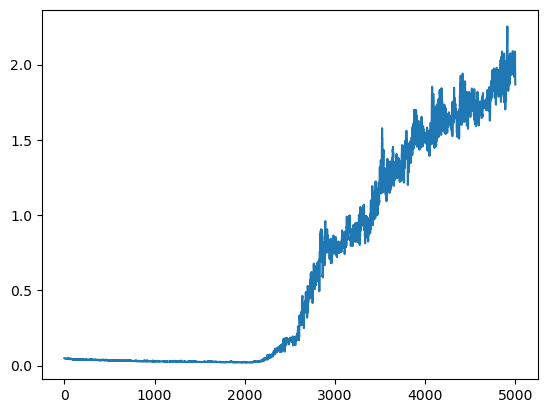

In [17]:
plt.plot(q_start)

In [26]:
Q.min()

-99.99998853633055

In [13]:
method = "ValIter"
path = env.simulate((0, 0), policy, method)
print(path, len(path))
# mz.animate_solution(maze, path)

[State(player=(0, 0), minotaur=(6, 5), key=0), State(player=(1, 0), minotaur=(6, 4), key=0), State(player=(2, 0), minotaur=(5, 4), key=0), State(player=(3, 0), minotaur=(6, 4), key=0), State(player=(3, 1), minotaur=(6, 3), key=0), State(player=(4, 1), minotaur=(6, 4), key=0), State(player=(4, 2), minotaur=(5, 4), key=0), State(player=(4, 3), minotaur=(4, 4), key=0), State(player=(3, 3), minotaur=(4, 5), key=0), State(player=(2, 3), minotaur=(4, 4), key=0), State(player=(1, 3), minotaur=(4, 5), key=0), State(player=(1, 4), minotaur=(4, 6), key=0), State(player=(0, 4), minotaur=(4, 7), key=0), State(player=(0, 5), minotaur=(4, 6), key=0), State(player=(0, 6), minotaur=(3, 6), key=0), State(player=(0, 7), minotaur=(2, 6), key=1), State(player=(0, 6), minotaur=(1, 6), key=1), State(player=(0, 5), minotaur=(2, 6), key=1), State(player=(0, 4), minotaur=(2, 5), key=1), State(player=(1, 4), minotaur=(2, 4), key=1), State(player=(2, 4), minotaur=(1, 4), key=1), State(player=(3, 4), minotaur=(1,

In [4]:
env1 = mz.Maze(maze, poison_prob=0)
monte_carlo_success(policy, env1)

NameError: name 'policy' is not defined

In [3]:
f3 = "results/m2p0_q50k_0_1_0_0.npy"

In [29]:
gamma = 0.95
alpha = 0.1
epsilon = 1/3
n_episodes = 50000
Q, policy, q_start = ql.qlearning(env_p0, gamma, alpha, epsilon, n_episodes)
np.save(f3, (Q))

100%|██████████| 50000/50000 [08:50<00:00, 94.27it/s] 


In [36]:
Q = np.load(f3)
policy = Q.argmax(axis=1)

0.02

In [35]:
monte_carlo_success(policy, env)

100%|██████████| 1000/1000 [00:04<00:00, 243.16it/s]

0.57


In [25]:
Q.min()

-0.050000000000000044

In [5]:
gamma = 0.95
alpha = 0.1
epsilon = 1/3
n_episodes = 50000
Q, policy, q_start = sarsa(env_p0, gamma, alpha, epsilon, n_episodes)
f4 = "results/m2p0_sarsa50k_0_1_0_0.npy"
np.save(f4, (Q))

100%|██████████| 50000/50000 [07:37<00:00, 109.28it/s]


In [6]:
monte_carlo_success(policy, env)

100%|██████████| 1000/1000 [00:05<00:00, 192.89it/s]

0.567


In [6]:
gamma = 0.95
alpha = 0.1
epsilon = 1/3
n_episodes = 5000
env_p0.set_rewards(0,1,-1,0)
Q, policy, q_start = mc(env_p0_wallminus1, gamma, alpha, epsilon, n_episodes)
f4 = "results/m2p0_mc50k_0_1_0_0.npy"
np.save(f4, (Q))

100%|██████████| 5000/5000 [00:36<00:00, 136.70it/s]


In [7]:
monte_carlo_success(policy, env_p0_wallminus1)

100%|██████████| 1000/1000 [00:06<00:00, 151.33it/s]

0.0


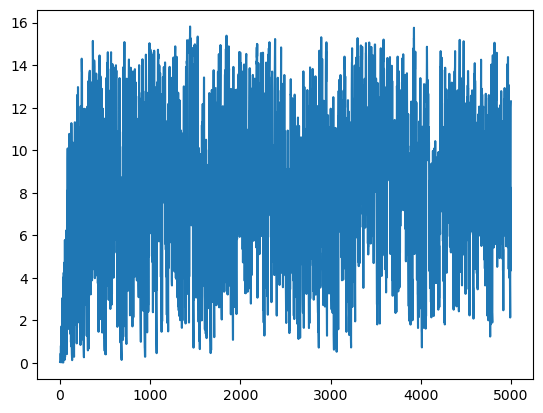

In [10]:
plt.plot(q_start)